# Források
https://www.tensorflow.org/tutorials/text/transformer

https://arxiv.org/pdf/2001.08317.pdf

https://arxiv.org/pdf/1907.00235.pdf

https://github.com/openai/sparse_attention/blob/master/attention.py

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DataStreamPreprocessor import DataStream, Normalizer, Batcher
import matplotlib.pyplot

'''
file = str("../logs/20200706_15_03_03/") # error
file = str("../logs/20200706_15_03_14/") # linear sho 312-123
file = str("../logs/20200706_15_54_06/") # linear mid 59000-23000
file = str("../logs/20200706_16_13_49/") # square mid 10000-3700
file = str("../logs/20200706_16_14_42/") # squrae mid 87000-34000
file = str("../logs/20200706_16_22_17/") # square mid 23000-8900 amorf
file = str("../logs/20200707_11_46_33/") # linear sho 3500-1400
file = str("../logs/20200707_12_32_33/") # error
file = str("../logs/20200707_12_32_38/") # error
file = str("../logs/20200707_12_32_41/") # error
file = str("../logs/20200707_12_34_38/") # error
file = str("../logs/20200707_13_12_55/") # error
file = str("../logs/20200707_13_13_09/") # linear lon 136000-54000
file = str("../logs/20200707_13_25_05/") # linear lon 120000-47000
file = str("../logs/20200707_13_33_27/") # linear lon 120000-46000
file = str("../logs/20200707_13_41_32/") # linear lon 130000-53000
file = str("../logs/20200707_14_44_12/") # infini lon 340000-134000
file = str("../logs/20200707_15_07_14/") # infini lon 370000-150000

file = str("../logs/20200826_15_51_57/") # random sho 26655
file = str("../logs/20200826_15_39_41/") # random sho 18464
file = str("../logs/20200826_15_47_49/") # random sho 41667
file = str("../logs/20200826_15_42_44/") # random sho 15481
file = str("../logs/20200826_16_09_56/") # random mid 135798

file = str("../logs/20200829_11_53_21/") # 1D no Noise yesPeriodic no Rot - d.keepData(0,91500)
file = str("../logs/20200829_12_05_54/") # 1D yesNoise yesPeriodic no Rot
file = str("../logs/20200829_12_14_39/") # 1D no Noise no Periodic no Rot
file = str("../logs/20200829_12_22_54/") # 1D yesNoise no Periodic no Rot
file = str("../logs/20200829_12_37_57/") # 1D no Noise yesPeriodic yesRot
file = str("../logs/20200829_12_50_33/") # 1D yesNoise yesPeriodic yesRot
file = str("../logs/20200829_12_58_43/") # 1D no Noise no Periodic yesRot
file = str("../logs/20200829_13_07_41/") # 1D yesNoise no Periodic yesRot
file = str("../logs/20200829_15_02_13/") # 2D no Noise yesPeriodic no Rot
file = str("../logs/20200829_15_14_20/") # 2D yesNoise yesPeriodic no Rot
file = str("../logs/20200829_15_24_14/") # 2D no Noise no Periodic no Rot
file = str("../logs/20200829_15_35_38/") # 2D yesNoise no Periodic no Rot
file = str("../logs/20200829_16_11_21/") # 2D no Noise yesPeriodic yesRot
file = str("../logs/20200829_16_25_41/") # 2D yesNoise yesPeriodic yesRot
file = str("../logs/20200829_16_39_47/") # 2D yesNoise no Periodic yesRot
file = str("../logs/20200829_16_48_48/") # 2D no Noise no Periodic yesRot
''';


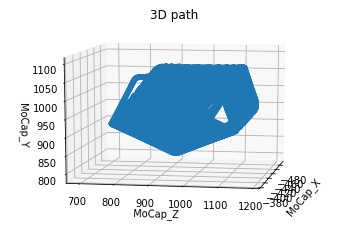

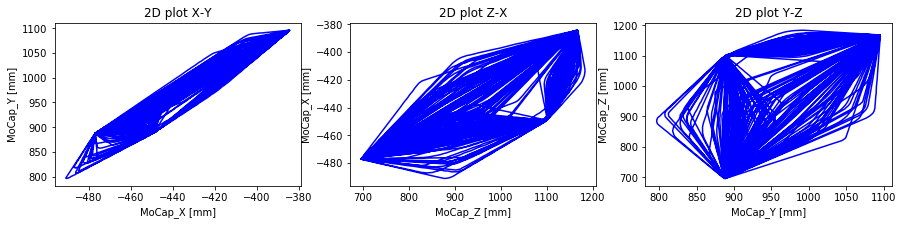

In [5]:
# Chose measurement pack
file = str("../logs/20200829_15_35_38/") # 2D yesNoise no Periodic no Rot

d = DataStream(file)

d.keepData(500,90000)

# Plot data
d.plotData(plot3D=True, plot2D=True)

In [6]:
d.addFeature(['diff_Timestamp', 'diff_Marg_posX', 'diff_Marg_posY', 'diff_Marg_posZ', 'diff_Marg_posX', 'diff_Marg_posY', 'diff_Marg_posZ'])
d.showHeader()

0 - Timestamp
1 - AccX
2 - AccY
3 - AccZ
4 - GyroX
5 - GyroY
6 - GyroZ
7 - MagX
8 - MagY
9 - MagZ
10 - Marg_posX
11 - Marg_posY
12 - Marg_posZ
13 - Marg_quatX
14 - Marg_quatY
15 - Marg_quatZ
16 - Marg_quatW
17 - Marg_rotX
18 - Marg_rotY
19 - Marg_rotZ
20 - diff_Timestamp
21 - diff_Marg_posX
22 - diff_Marg_posY
23 - diff_Marg_posZ
24 - diff_Marg_posX
25 - diff_Marg_posY
26 - diff_Marg_posZ


In [7]:
# Actual input and label data for the training. The columns defined in data_const will be constat in each sequence (first value)
data = [20,1,2,3,4,5,6,7,8,9,21,22,23]
data_const = [-3,-2,-1]

label = [24,25,26]

num_layers = 2
d_model = 32
dff = 128
num_heads = 16
input_size = len(data)
target_size = len(label)
dropout_rate = 0.1

in_seq_len = 64
tar_seq_len = 64
batch_size = 128

logsparse_local = 7 #logsparse attention kozvetlen szomszedosan figyelheto elemei
logsparse_restarts = 1 #logsparse attention log tartomanyainak szama (legyen osztoja a teljes meretnek, ha lehet)
conv_size = 7 #causal conv retegek ablakmerete

In [8]:
d.filterData(31, 'hanning', [21, 21, 23, 24, 25, 26])

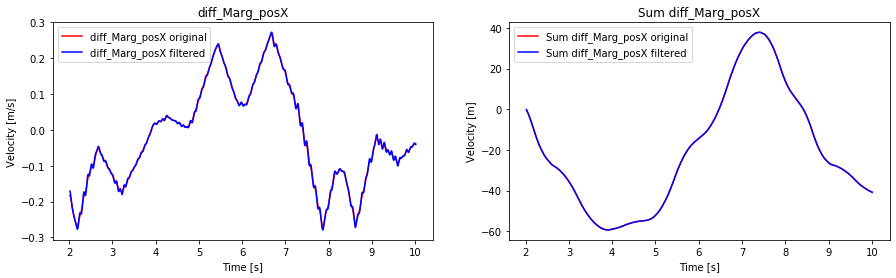

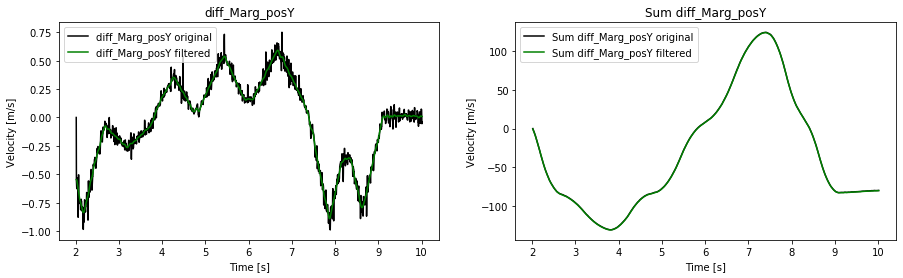

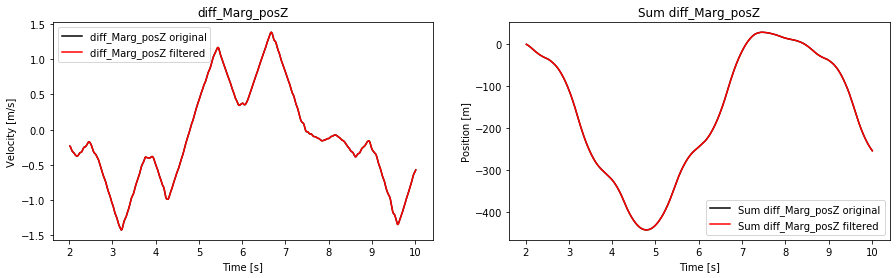

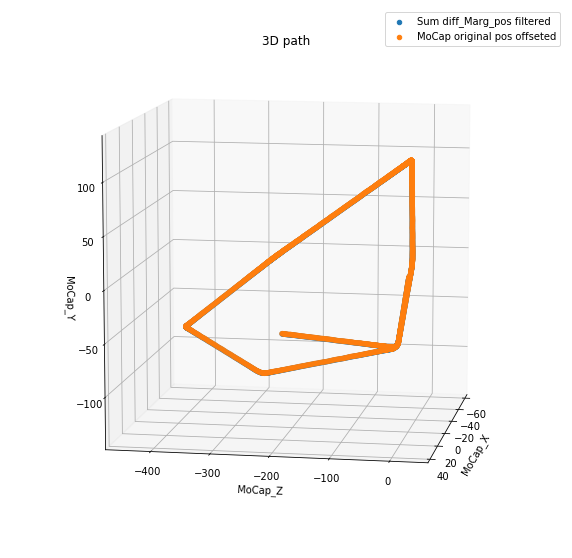

In [9]:
#plot

start = 0
end = 2000

fig, axs = plt.subplots(1, 2, figsize=(15,4))
#plt.figure(3)
axs[0].set_title("diff_Marg_posX")
axs[0].plot(d.data[start:end,0], d.data[start:end,21], color='red',  label='diff_Marg_posX original')
axs[0].plot(d.data[start:end,0], d.data[start:end,24], color='blue', label='diff_Marg_posX filtered')
axs[0].set(xlabel= 'Time [s]')
axs[0].set(ylabel='Velocity [m/s]')
axs[0].legend()

axs[1].set_title("Sum diff_Marg_posX")
axs[1].plot(d.data[start:end,0], np.cumsum(d.data[start:end,21]), color='red',  label='Sum diff_Marg_posX original')
axs[1].plot(d.data[start:end,0], np.cumsum(d.data[start:end,24]), color='blue', label='Sum diff_Marg_posX filtered')
axs[1].set(xlabel= 'Time [s]')
axs[1].set(ylabel='Velocity [m]')
axs[1].legend()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(15,4))
#plt.figure(3)
axs[0].set_title("diff_Marg_posY")
axs[0].plot(d.data[start:end,0], d.data[start:end,22], color='black', label='diff_Marg_posY original')
axs[0].plot(d.data[start:end,0], d.data[start:end,25], color='green', label='diff_Marg_posY filtered')
axs[0].set(xlabel= 'Time [s]')
axs[0].set(ylabel='Velocity [m/s]')
axs[0].legend()

axs[1].set_title("Sum diff_Marg_posY")
axs[1].plot(d.data[start:end,0], np.cumsum(d.data[start:end,22]), color='black', label='Sum diff_Marg_posY original')
axs[1].plot(d.data[start:end,0], np.cumsum(d.data[start:end,25]), color='green', label='Sum diff_Marg_posY filtered')
axs[1].set(xlabel= 'Time [s]')
axs[1].set(ylabel='Velocity [m/s]')
axs[1].legend()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(15,4))
axs[0].set_title("diff_Marg_posZ")
axs[0].plot(d.data[start:end,0], d.data[start:end,23], color='black', label='diff_Marg_posZ original')
axs[0].plot(d.data[start:end,0], d.data[start:end,26], color='red',   label='diff_Marg_posZ filtered')
axs[0].set(xlabel= 'Time [s]')
axs[0].set(ylabel='Velocity [m/s]')
axs[0].legend()

axs[1].set_title("Sum diff_Marg_posZ")
axs[1].plot(d.data[start:end,0], np.cumsum(d.data[start:end,23]), color='black', label='Sum diff_Marg_posZ original')
axs[1].plot(d.data[start:end,0], np.cumsum(d.data[start:end,26]), color='red',   label='Sum diff_Marg_posZ filtered')
axs[1].set(xlabel= 'Time [s]')
axs[1].set(ylabel='Position [m]')
axs[1].legend()
plt.show()

plt.figure(10,figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(np.cumsum(d.data[start:end,24]), np.cumsum(d.data[start:end,26]), np.cumsum(d.data[start:end,25]), cmap='Greens', label='Sum diff_Marg_pos filtered')
ax.scatter3D(d.data[start:end,10]-d.data[start,10], d.data[start:end,12]-d.data[start,12], d.data[start:end,11]-d.data[start,11], cmap='Greens', label='MoCap original pos offseted')
ax.set_xlabel('MoCap_X')
ax.set_ylabel('MoCap_Z')
ax.set_zlabel('MoCap_Y')
ax.set_title('3D path');
ax.view_init(10, 10)
plt.legend()
plt.show()

In [7]:
# Parsing the data
X_alap, X_header, _, _ = d.dataParser(data, [], in_seq_len)
_, _, Y_alap, Y_header = d.dataParser([], label, tar_seq_len)
Y_alap = Y_alap[in_seq_len-tar_seq_len:,:,:]

nx = Normalizer()
ny = Normalizer()

X_norm = nx.normalize(X_alap)
Y_norm = ny.normalize(Y_alap)

# Batching the data
batcher = Batcher(batch_size, shuffle=True)
X = batcher.batch(X_norm)
Y = batcher.batch(Y_norm)

# Dimension check
print('d.data: ', d.data.shape)
print('X_alap:   ', X_alap.shape, '   Y_alap: ', Y_alap.shape)
print('X_norm:   ', X_norm.shape, '   Y_norm: ', Y_norm.shape)
print('X:        ', X.shape,      ' Y:      ', Y.shape)

d.data:  (89500, 27)
X_alap:    (89437, 64, 13)    Y_alap:  (89437, 64, 3)
X_norm:    (89437, 64, 13)    Y_norm:  (89437, 64, 3)
X:         (698, 128, 64, 13)  Y:       (698, 128, 64, 3)


In [8]:
import tensorflow as tf
import time

In [26]:
def get_angles(pos, i, d_model):
    angle_rates = 1/np.power(10000, (2*(i//2))/np.float32(d_model))
    return pos*angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:,np.newaxis],
                            np.arange(d_model)[np.newaxis,:],
                            d_model)
    angle_rads[:,0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:,1::2] = np.cos(angle_rads[:, 1::2])
    
    pos_encoding = angle_rads[np.newaxis,...]
    return tf.cast(pos_encoding, dtype=tf.float32)

def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size,size)),-1,0)
    return mask


def rotate(matrix, shifts):
    """"requested rotate function - assumes matrix shape is mxn and shifts shape is m"""

    # get shape of the input matrix
    shape = tf.shape(matrix)

    # compute and stack the meshgrid to get the index matrix of shape (2,m,n)
    ind = tf.stack(tf.meshgrid(tf.range(shape[0]), tf.range(shape[1]), indexing='ij'))

    # reshape it to (m,n,2)
    ind = tf.transpose(ind, [1,2,0])

    # add the value from shifts to the corresponding row and devide modulo shape[1]
    # this will effectively introduce the desired shift, but at the level of indices
    shifted_ind = tf.math.mod(tf.transpose(tf.transpose(ind[:,:,1]) + shifts), shape[1])

    # convert the shifted indices to the right shape
    new_ind = tf.transpose(tf.stack([ind[:,:,0], shifted_ind]) , [1,2,0]) 

    # return the resliced tensor
    return tf.gather_nd(matrix, new_ind)


def create_log_sparse_mask(size, local, logparts):
    intlen = (size-local)//logparts
    logn = tf.cast(tf.math.floor(tf.math.log(tf.cast(intlen,tf.float32))/tf.math.log(2.0)),tf.int32)

    idx = tf.reverse(tf.cast(tf.reshape(tf.math.pow(2,int(logn)-tf.range(logn+1, dtype=tf.int32))-1,[logn+1,1]),tf.int64),[0])
    idx = tf.reshape(tf.stack([idx,tf.zeros([logn+1,1],dtype=tf.int64)],axis=1),[logn+1,2])
    x = tf.sparse.SparseTensor(idx, tf.ones(logn+1,dtype=tf.int32), dense_shape=[intlen,1])
    x = tf.reverse(tf.sparse.to_dense(x),[0])
    x = tf.transpose(tf.concat([tf.tile(x,[logparts,1]),tf.ones([local,1],dtype=tf.int32)],axis=0))

    z = tf.zeros([size, size], dtype=tf.int32)
    q = z + tf.reshape(tf.range(size),[size,1])

    k = z + tf.reshape(tf.range(size),[1,size])
    c1 = q >= k
    c2 = tf.cast(rotate(z+x,size-1-1*tf.range(size)),tf.bool)
    c3 = tf.logical_and(c1, c2)

    return 1.0-tf.cast(c3, tf.float32)


def scaled_dot_product_attention(q, k, v, mask):
    """Calculate the attention weights.
    q, k, v must have matching leading dimensions.
    k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
    The mask has different shapes depending on its type(padding or look ahead) 
    but it must be broadcastable for addition.

    Args:
    q: query shape == (..., seq_len_q, depth)
    k: key shape == (..., seq_len_k, depth)
    v: value shape == (..., seq_len_v, depth_v)
    mask: Float tensor with shape broadcastable 
          to (..., seq_len_q, seq_len_k). Defaults to None.

    Returns:
    output, attention_weights
    """
    
    matmul_qk = tf.matmul(q, k, transpose_b = True)
    
    dk = tf.cast(tf.shape(k)[-1],tf.float32)
    scaled_attention_logits = matmul_qk/tf.math.sqrt(dk)
    
    if mask is not None:
        scaled_attention_logits += (mask* -1e9) # softmax az 1esek helyen kozel vegtelen negativ inputra kozel nulla outputot ad majd
        
        
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
    
    output = tf.matmul(attention_weights, v)
    
    return output, attention_weights

def print_out(q, k, v):
    temp_out, temp_attn = scaled_dot_product_attention(q, k, v, None)
    print ('Attention weights are:')
    print (temp_attn)
    print ('Output is:')
    print (temp_out)

In [27]:
class CausalConvMultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, kernel_size, num_heads):
        super(CausalConvMultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        
        assert d_model % self.num_heads == 0
        
        self.depth = d_model // self.num_heads
        
        self.wq = tf.keras.layers.Conv1D(d_model,kernel_size,padding="causal")
        self.wk = tf.keras.layers.Conv1D(d_model,kernel_size,padding="causal")
        self.wv = tf.keras.layers.Conv1D(d_model,1,padding="same")
        
        self.dense = tf.keras.layers.Dense(d_model)
        
    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0,2,1,3])
    
    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]
        
        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)
        
        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)
        
        scaled_attention, attention_weights = scaled_dot_product_attention(q,k,v,mask)
        
        scaled_attention = tf.transpose(scaled_attention, perm=[0,2,1,3])
        concat_attention = tf.reshape(scaled_attention, (batch_size,-1, self.d_model))
        
        output = self.dense(concat_attention)
        
        return output, attention_weights

In [28]:
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation = "relu"),
        tf.keras.layers.Dense(d_model)
    ])

In [29]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, kernel_size, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()
        
        self.mha = CausalConvMultiHeadAttention(d_model, kernel_size, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model,dff)
        
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        
    def call(self, x, training, mask):
        attn_output, _ = self.mha(x,x,x,mask)
        attn_output = self.dropout1(attn_output, training = training)
        out1 = self.layernorm1(x+attn_output)
        
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training = training)
        out2 = self.layernorm2(out1+ffn_output)
        
        return out2
        

In [30]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, kernel_size, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()
        
        self.mha1 = CausalConvMultiHeadAttention(d_model, kernel_size, num_heads)
        self.mha2 = CausalConvMultiHeadAttention(d_model, kernel_size, num_heads)
        
        self.ffn = point_wise_feed_forward_network(d_model, dff)
        
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)
        
    def call(self, x, enc_output, training, look_ahead_mask):
        attn1, attn_weights_block1 = self.mha1(x,x,x,look_ahead_mask)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1+x)
        
        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, None)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2+out1)
        
        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output+out2)
        
        return out3, attn_weights_block1, attn_weights_block2
        
        

In [31]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, kernel_size, num_heads, dff, input_size, 
                maximum_position_encoding, rate=0.1):
        super(Encoder, self).__init__()
        
        self.d_model = d_model
        self.num_layers = num_layers
        
        self.redimension_layer = tf.keras.layers.Conv1D(d_model,1,padding="same")

        self.enc_layers = [EncoderLayer(d_model, kernel_size, num_heads, dff, rate)
                          for _ in range(num_layers)]
        
        self.dropout = tf.keras.layers.Dropout(rate)
        
    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1]
        
        x = self.redimension_layer(x)
        
        #Maybe: x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        #x = tf.reshape(x,(-1, seq_len, self.d_model))
        
        x = self.dropout(x, training=training)
        
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)
            
        return x
        

In [43]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, kernel_size, num_heads, dff, target_size,
                 maximum_position_encoding, rate=0.1):
        super(Decoder, self).__init__()
        
        self.d_model = d_model
        self.num_layers = num_layers
        
        self.redimension_layer = tf.keras.layers.Conv1D(d_model,1,padding="same")
        
        self.dec_layers = [DecoderLayer(d_model, kernel_size, num_heads, dff, rate)
                          for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)
        
    def call(self, x, enc_output, training, look_ahead_mask):
        attention_weights = {}
        seq_len = tf.shape(x)[1]
        
        x = self.redimension_layer(x)
        
        x = self.dropout(x, training=training)
        
        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                                 look_ahead_mask)
            
            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
        
        return x, attention_weights
        

In [44]:
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, kernel_size, num_heads, dff, input_size, target_size, pe_input, pe_target, rate=0.1):
        super(Transformer, self).__init__()
        self.encoder = Encoder(num_layers, d_model, kernel_size, num_heads, dff, input_size, pe_input, rate)
        self.decoder = Decoder(num_layers, d_model, kernel_size, num_heads, dff, target_size, pe_target, rate)
        
        self.final_layer = tf.keras.layers.Dense(target_size)
        
    def call(self, inp, tar, training, enc_mask, dec_mask):
        enc_output = self.encoder(inp, training, enc_mask)
        
        dec_output, attention_weights = self.decoder(tar, enc_output, training,
                                                    dec_mask)
        final_output = self.final_layer(dec_output)
        
        return final_output, attention_weights, enc_output

In [45]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        
        self.warmup_steps = warmup_steps
        
    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step*(self.warmup_steps ** -1.5)
        
        return tf.math.rsqrt(self.d_model)*tf.math.minimum(arg1, arg2)

In [46]:
learning_rate = CustomSchedule(d_model, warmup_steps=4000)
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9,
                                     beta_2=0.98, epsilon=1e-9)

In [47]:
def loss_function(real, pred):
    return tf.reduce_mean(tf.math.square(real-pred))

train_loss = tf.keras.metrics.Mean(name='train_loss')

In [48]:
transformer = Transformer(num_layers,d_model,conv_size, num_heads, dff,
                          input_size, target_size, pe_input=in_seq_len,
                         pe_target=tar_seq_len, rate=dropout_rate)

In [49]:
def create_masks(inp, tar,local,logparts):
    #look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    #print(tf.shape(tar)[1])
    enc_mask = create_log_sparse_mask(tf.shape(inp)[1],local,logparts)
    dec_mask = create_log_sparse_mask(tf.shape(tar)[1],local,logparts)
    return enc_mask, dec_mask

In [50]:
checkpoint_path = "./checkpoints/train"

ckpt = tf.train.Checkpoint(transformer=transformer, optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

'''
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print("Checkpoint restored")
'''

'\nif ckpt_manager.latest_checkpoint:\n    ckpt.restore(ckpt_manager.latest_checkpoint)\n    print("Checkpoint restored")\n'

In [51]:
epochs = 16

In [52]:
train_step_signature =  [
    tf.TensorSpec(shape=(None, None, input_size), dtype=tf.float32),
    tf.TensorSpec(shape=(None, None, target_size), dtype=tf.float32)
    ]

@tf.function(input_signature=train_step_signature)
def train_step(inp, tar):
    tar_inp = tar[:,:-1,:]
    tar_real = tar[:, 1:,:]
    
    enc_mask,dec_mask = create_masks(inp, tar_inp,logsparse_local,logsparse_restarts)
    
    with tf.GradientTape() as tape:
        predictions, _, _ = transformer(inp, tar_inp, True, enc_mask, dec_mask)
        
        loss = loss_function(tar_real, predictions)
        
    gradients = tape.gradient(loss, transformer.trainable_variables)
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
    
    train_loss(loss)

In [53]:
for epoch in range(epochs):
    stime = time.time()
    
    train_loss.reset_states()
    
    for batch in range(X.shape[0]):
        inp = X[batch,:,:,:]
        tar = Y[batch,:,:,:]
        train_step(inp, tar)
        
        if batch % 50 ==0:
            print('Epoch {} Batch {} Loss {:.7f}'.format(
            epoch+1, batch, train_loss.result()
            ))
    
    if (epoch+1) %5 ==0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                         ckpt_save_path))
    
    print ('Epoch {} Loss {:.7f}'.format(epoch + 1, 
                                                train_loss.result()))

    print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - stime))
        

Epoch 1 Batch 0 Loss 2.4889741
Epoch 1 Batch 50 Loss 1.5955077
Epoch 1 Batch 100 Loss 1.0107415
Epoch 1 Batch 150 Loss 0.7444229
Epoch 1 Batch 200 Loss 0.5914319
Epoch 1 Batch 250 Loss 0.4905050
Epoch 1 Batch 300 Loss 0.4180638
Epoch 1 Batch 350 Loss 0.3633233
Epoch 1 Batch 400 Loss 0.3205491
Epoch 1 Batch 450 Loss 0.2864244
Epoch 1 Batch 500 Loss 0.2587195
Epoch 1 Batch 550 Loss 0.2358424
Epoch 1 Batch 600 Loss 0.2166547
Epoch 1 Batch 650 Loss 0.2003457
Epoch 1 Loss 0.1870962
Time taken for 1 epoch: 96.8809506893158 secs

Epoch 2 Batch 0 Loss 0.0032417
Epoch 2 Batch 50 Loss 0.0030694


KeyboardInterrupt: 

In [101]:
stime=time.time()
idx = 20000
inp = X_norm[idx].reshape((1,in_seq_len,input_size))
tar = Y_norm[idx].reshape((1,tar_seq_len,target_size))
tar_inp = tar[:,:-1,:]
tar_last = Y_alap[idx,-1,:]
lookahead_mask = create_masks(inp, tar_inp,3,1)
pred, _ = transformer(inp, tar_inp, False, lookahead_mask)
denormed = ny.denormalize_prediction(pred)[0,-1,:]
print("Predicted: ", denormed,"\n\nReal: ",tar_last)
print(time.time()-stime)

Predicted:  tf.Tensor([0.25685215 0.6574724  0.91697717], shape=(3,), dtype=float32) 

Real:  [0.25232962 0.65732807 0.9208268 ]
0.08676600456237793


In [102]:
Xcoord = []
Ycoord = []
Zcoord = []
Xdiff = []
Ydiff = []
Zdiff = []
maxsteps = 2000
times = np.arange(maxsteps)*0.004
for idx in range(maxsteps):
    #stime = time.time()
    inp = X_norm[idx].reshape((1,in_seq_len,input_size))
    tar = Y_norm[idx].reshape((1,tar_seq_len,target_size))
    tar_inp = tar[:,:-1,:]
    tar_last = Y_alap[idx,-1,:]
    lookahead_mask = create_masks(inp, tar_inp,3,1)
    pred, _ = transformer(inp, tar_inp, False, lookahead_mask)
    denormed = ny.denormalize_prediction(pred)[0,-1,:]
    #appendtime=time.time()
    Xcoord.append(denormed[0])
    Ycoord.append(denormed[1])
    Zcoord.append(denormed[2])
    diff = denormed-tar_last
    Xdiff.append(diff[0])
    Ydiff.append(diff[1])
    Zdiff.append(diff[2])
    #print("Full: ",time.time()-stime,"  Append: ",time.time()-appendtime)

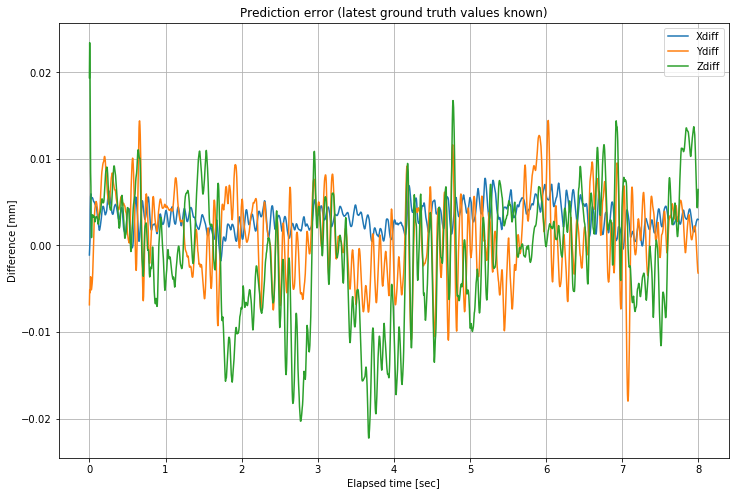

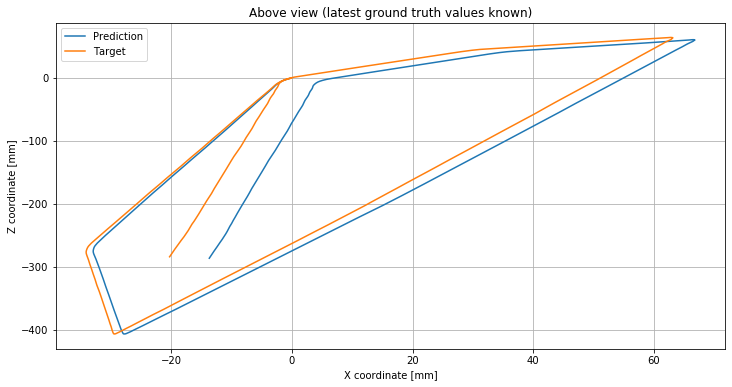

In [103]:
plt.figure(1,figsize=(12,8))
plt.title("Prediction error (latest ground truth values known)")
plt.plot(times, Xdiff)
plt.plot(times, Ydiff)
plt.plot(times, Zdiff)
plt.ylabel("Difference [mm]")
plt.xlabel("Elapsed time [sec]")
plt.legend(["Xdiff","Ydiff","Zdiff"])
plt.grid()


x_pred = np.cumsum(Xcoord)
z_pred = np.cumsum(Zcoord)
x_tar = np.cumsum(Y_alap[:maxsteps,-1,0])
z_tar = np.cumsum(Y_alap[:maxsteps,-1,2])

plt.figure(4,figsize=(12,6))
plt.title("Above view (latest ground truth values known)")
plt.plot(x_pred,z_pred, label='Prediction')
plt.plot(x_tar,z_tar, label= 'Target')
plt.ylabel("Z coordinate [mm]")
plt.xlabel("X coordinate [mm]")
plt.legend()
plt.grid()

In [104]:
Xcoord = []
Ycoord = []
Zcoord = []
Xdiff = []
Ydiff = []
Zdiff = []
maxsteps = 2000
idx = 0
times = np.arange(maxsteps)*0.004
tar = Y_norm[idx].reshape((1,tar_seq_len,target_size))
tar_inp = tar[:,:-1,:]
for idx in range(maxsteps):
    inp = X_norm[idx].reshape((1,in_seq_len,input_size))
    tar_last = Y_alap[idx,-1,:]
    lookahead_mask = create_masks(inp, tar_inp,3,1)
    pred, _ = transformer(inp, tar_inp, False, lookahead_mask)
    denormed = ny.denormalize_prediction(pred)[0,-1,:]
    #print(denormed.shape)
    Xcoord.append(denormed[0])
    Ycoord.append(denormed[1])
    Zcoord.append(denormed[2])
    #print(tar_inp[:,-1,:])
    diff = denormed-tar_last
    if idx > 100:
        tar_inp=np.concatenate([tar_inp[:,1:,:],np.array(pred[0,-1,:]).reshape(1,1,-1)],axis=1)
    else:
        tar = Y_norm[idx].reshape((1,tar_seq_len,target_size))
        tar_inp = tar[:,:-1,:]
    Xdiff.append(diff[0])
    Ydiff.append(diff[1])
    Zdiff.append(diff[2])

'\nplt.figure(3,figsize=(12,8))\nplt.title("Above view (With initial ground truth only)")\nplt.plot(Xcoord, Zcoord)\n#plt.plot(Y_alap[:2000,-1,0],Y_alap[:2000,-1,2])\nplt.ylabel("Z coordinate [mm]")\nplt.xlabel("X coordinate [mm]")\nplt.legend(["Predicted","Ground truth"])\nplt.grid()\n'

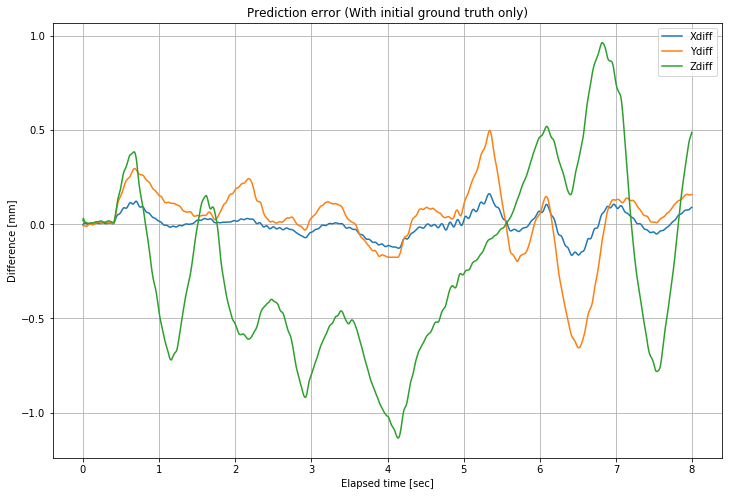

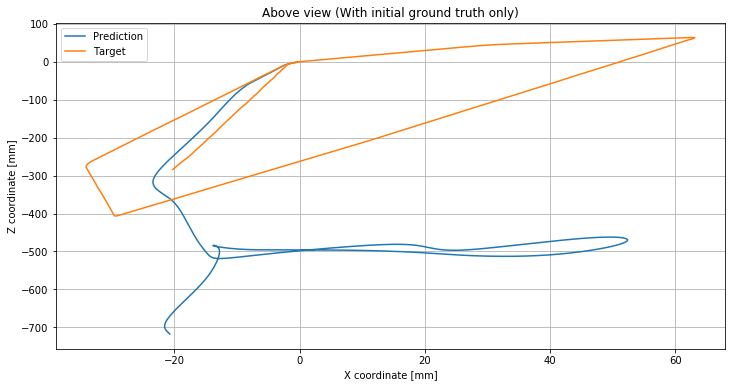

In [105]:
plt.figure(1,figsize=(12,8))
plt.title("Prediction error (With initial ground truth only)")
plt.plot(times, Xdiff)
plt.plot(times, Ydiff)
plt.plot(times, Zdiff)
plt.ylabel("Difference [mm]")
plt.xlabel("Elapsed time [sec]")
plt.legend(["Xdiff","Ydiff","Zdiff"])
plt.grid()


x_pred = np.cumsum(Xcoord)
z_pred = np.cumsum(Zcoord)
x_tar = np.cumsum(Y_alap[:maxsteps,-1,0])
z_tar = np.cumsum(Y_alap[:maxsteps,-1,2])

plt.figure(4,figsize=(12,6))
plt.title("Above view (With initial ground truth only)")
plt.plot(x_pred,z_pred, label='Prediction')
plt.plot(x_tar,z_tar, label= 'Target')
plt.ylabel("Z coordinate [mm]")
plt.xlabel("X coordinate [mm]")
plt.legend()
plt.grid()

'''
plt.figure(3,figsize=(12,8))
plt.title("Above view (With initial ground truth only)")
plt.plot(Xcoord, Zcoord)
#plt.plot(Y_alap[:2000,-1,0],Y_alap[:2000,-1,2])
plt.ylabel("Z coordinate [mm]")
plt.xlabel("X coordinate [mm]")
plt.legend(["Predicted","Ground truth"])
plt.grid()
'''

In [106]:
print(len(Xcoord))
print(len(Y_alap))

2000
89373


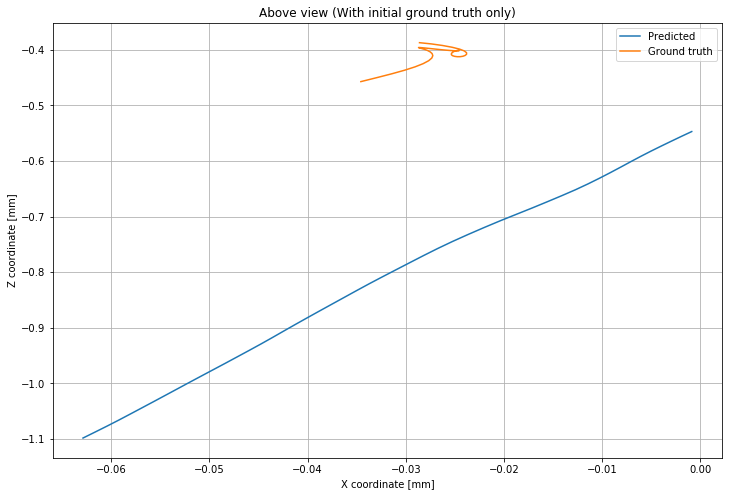

In [107]:
plt.figure(4,figsize=(12,8))
plt.title("Above view (With initial ground truth only)")
plt.plot(Xcoord[1900:1950], Zcoord[1900:1950])
plt.plot(Y_alap[1900:1950,-1,0],Y_alap[1900:1950,-1,2])
plt.ylabel("Z coordinate [mm]")
plt.xlabel("X coordinate [mm]")
plt.legend(["Predicted","Ground truth"])
plt.grid()

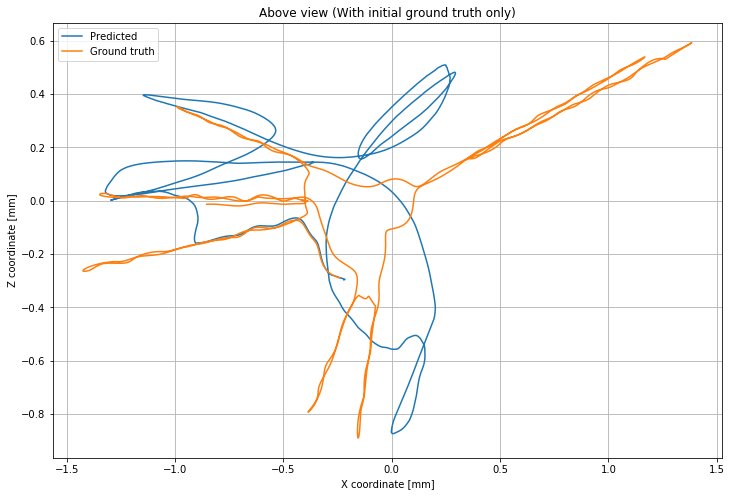

In [108]:
plt.figure(2,figsize=(12,8))
plt.title("Above view (With initial ground truth only)")
plt.plot(Zcoord, Ycoord)
plt.plot(Y_alap[:2000,-1,2],Y_alap[:2000,-1,1])
plt.ylabel("Z coordinate [mm]")
plt.xlabel("X coordinate [mm]")
plt.legend(["Predicted","Ground truth"])
plt.grid()
plt.show()